# 1. Install, Imports, Settings

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

# 2. Load data

In [3]:
df = pd.read_csv("data/alertas.csv", sep="|")
print("Total Number of documents:", len(df))
print("Number of documents with no accesible text:", len(df[df['Text']==" "]))
print("Number of documents with accesible text:",  len(df[df['Text'] !=" "]))

Total Number of documents: 919
Number of documents with no accesible text: 253
Number of documents with accesible text: 666


# 3. Number of Documents by Type

In [4]:
df.groupby("Type").agg({"Filename":"count"})

,Filename
Type,
advertencia,867
seguimiento,52


# 4 Number of documents by Year

In [5]:
df.groupby(["Type", "Year"]).agg({"Filename":"count"})

Filename
Type        Year          
advertencia 2001        71
            2002        92
            2003        84
            2004        90
            2005        65
            2006        52
            2007        38
            2008        32
            2009        31
            2010        18
            2011        20
            2012        31
            2013         5
            2018        89
            2019        56
            2020        54
            2021        25
            2022        14
seguimiento 2018        15
            2019        37

In [6]:
dfg = df.groupby(["Type", "Year"]).agg({"Filename":"count"}).reset_index()
dfg = pd.pivot_table(dfg, values='Filename', index=['Year'],
                    columns=['Type'], aggfunc=np.sum)
dfg = dfg.fillna(0)

Text(0, 0.5, 'Cantidad de documentos')

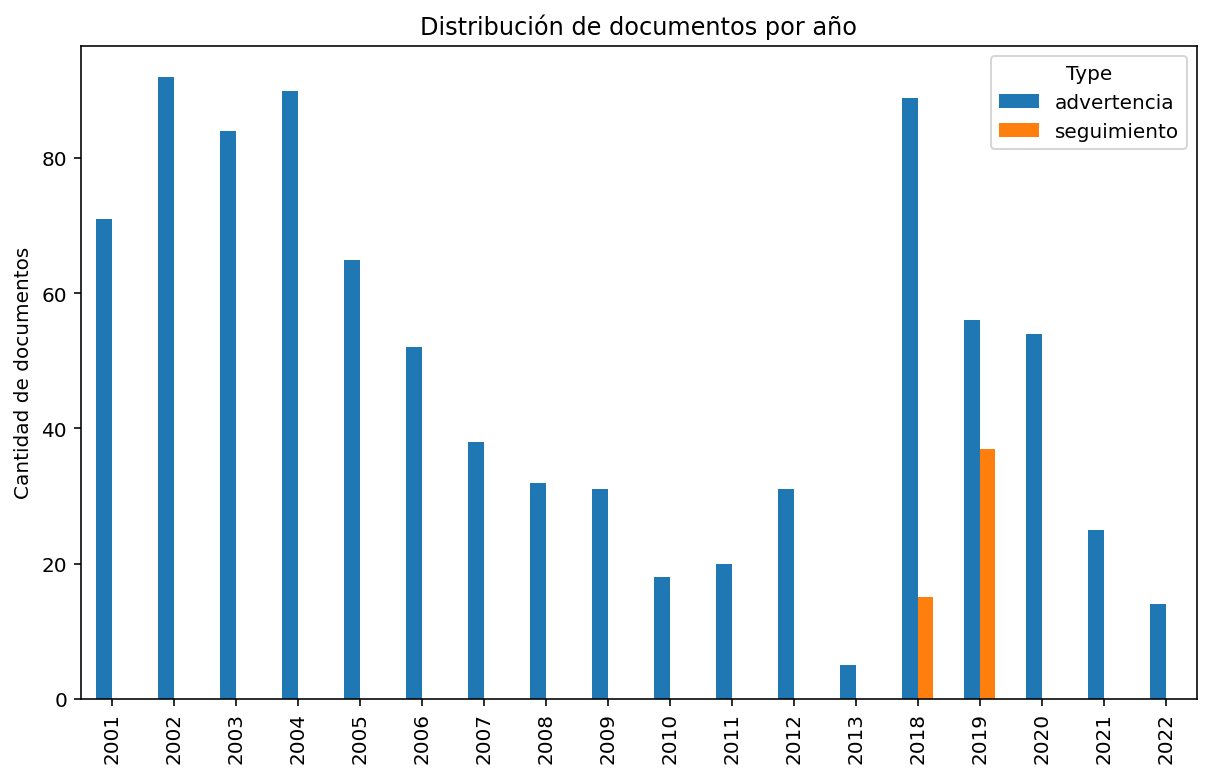

In [7]:
dfg.plot(kind="bar")
plt.title("Distribución de documentos por año")
plt.xlabel("")
plt.ylabel("Cantidad de documentos")

# 5. Top Years - Sort Descending

In [8]:
dfh = df.groupby(["Year"]).agg({"Filename":"count"}).sort_values("Filename", ascending = False)
dfh.columns = ["Number of documents"]
dfh

,Number of documents
Year,
2018,104
2019,93
2002,92
2004,90
2003,84
2001,71
2005,65
2020,54
2006,52


# 6. Statistical Distribution of Number of Documents per Year

In [9]:
dfh.describe()

,Number of documents
count,18.000000
mean,51.055556
std,31.632954
min,5.000000
25%,26.500000
50%,45.000000
75%,80.750000
max,104.000000


# 7. Export HTML

In [10]:
!jupyter nbconvert --to html 2_Distribution_of_documents.ipynb

[NbConvertApp] Converting notebook 2_Distribution_of_documents.ipynb to html
[NbConvertApp] Writing 619579 bytes to 2_Distribution_of_documents.html
